# 基于CNN模型的物体识别

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

 答：50\*25\*25 + 50 = 1300个参数

### 2.2. What are "local invariant" and "parameter sharing" ?

答： 1. 空间不变性是指原来图像中的信息不管信息位置在哪，程序都能识别出该信息的含义。利用该特性是卷积使用的基础。
    2. 共享参数是指不同位置的图像在卷积过程中使用同样参数的卷积核，可以大大减少参数数量减少 

### 2.3. Why we use batch normalization ?

答： 防止由于数据之间量级相差过大在模型传递过程中引起信息损失

### 2.4. What problem does dropout try to solve ?

答： 在训练过程中由于数据少参数多模型过于复杂引起的过拟合问题

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

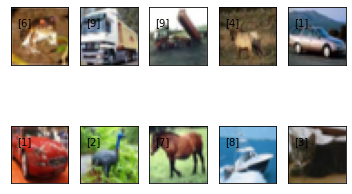

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [4]:
#print(tf.keras)
import keras

Using TensorFlow backend.


###  Congratulations! You hanve finished the assignment 3.   

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [10]:
type(x_train)

numpy.ndarray

filters:滤波器数量  
kernel_size：卷积核尺寸 可以写5 或 （3， 2）  
strides：步长  
padding：不填充（‘same’）还是零填充（‘valid’）  
input_shape：输入图片尺寸  
kernel_initializer:卷积核初始化种类

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
# 导入数据
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# y数据为二进制编码形式（不转换为一维数据，转化完为10维）
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# 创建model
model = Sequential()
# 添加第一层卷积
model.add(Conv2D(32, (3, 3), strides=1, input_shape=x_train.shape[1:], kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
# 第二层卷积+池化+dropout
model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
# 第三层卷积+池化+dropout
model.add(Conv2D(64, (3, 3), kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
# 全连接层
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# 优化器
opt = keras.optimizers.rmsprop(0.0001, 1e-6)

# 模型
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# 训练
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_test, y_test),
          shuffle=False)
# 评估
score = model.evaluate(x_test, y_test, batch_size=1000)


#### 23s 461us/step - loss: 1.0524 - accuracy: 0.6362 - val_loss: 1.0462 - val_accuracy: 0.6534